## ASSOCIATION RULES

In [58]:
# Step 1: Import Libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Step 2: Load Excel Data (Preprocessed as Transaction List)
df = pd.read_excel("Online retail.xlsx")

In [60]:
# Step 3: Clean and Prepare Transactions
# Assuming each row is one transaction (string of comma-separated items)
df.columns = ["Transaction"]  # Rename for clarity

In [61]:
#  here we Split each string of comma-separated items into a list.
# Created a list of lists for transactions.

In [62]:
df.dropna(inplace=True)  # Remove missing
transactions = df["Transaction"].apply(lambda x: x.split(","))


In [63]:
# Step 4: Transaction Encoding
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
# Created a DataFrame where:
# Columns = all unique products.
# Rows = customer transactions.

In [65]:
# Step 5: Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [66]:
# You can now see the most common itemsets.
# Higher support = more commonly purchased together.

In [67]:
# Step 6: Generate Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
217,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,1.0,0.011139,1.332841,0.732423,0.121457,0.249723,0.243136
216,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,1.0,0.011139,1.135402,0.772060,0.121457,0.119255,0.243136
386,"(mineral water, spaghetti)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,1.0,0.011197,1.262427,0.697745,0.121097,0.207875,0.229696
387,(ground beef),"(mineral water, spaghetti)",0.098267,0.059733,0.017067,0.173677,2.907540,1.0,0.011197,1.137893,0.727562,0.121097,0.121182,0.229696
398,"(mineral water, spaghetti)",(olive oil),0.059733,0.065733,0.010267,0.171875,2.614731,1.0,0.006340,1.128171,0.656783,0.089120,0.113610,0.164031


In [68]:
# Step 6: Generate Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules.sort_values(by="lift", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
75,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,1.0,0.011139,1.332841,0.732423,0.121457,0.249723,0.243136
154,"(mineral water, spaghetti)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,1.0,0.011197,1.262427,0.697745,0.121097,0.207875,0.229696
69,(tomatoes),(frozen vegetables),0.068400,0.095333,0.016133,0.235867,2.474134,1.0,0.009613,1.183913,0.639564,0.109304,0.155344,0.202549
67,(shrimp),(frozen vegetables),0.071333,0.095333,0.016667,0.233645,2.450820,1.0,0.009866,1.180480,0.637444,0.111111,0.152887,0.204235
143,"(milk, mineral water)",(frozen vegetables),0.048000,0.095333,0.011067,0.230556,2.418415,1.0,0.006491,1.175740,0.616078,0.083669,0.149472,0.173320


In [69]:
# Step 6: Generate Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
217,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,1.0,0.011139,1.332841,0.732423,0.121457,0.249723,0.243136
216,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,1.0,0.011139,1.135402,0.772060,0.121457,0.119255,0.243136
386,"(mineral water, spaghetti)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,1.0,0.011197,1.262427,0.697745,0.121097,0.207875,0.229696
387,(ground beef),"(mineral water, spaghetti)",0.098267,0.059733,0.017067,0.173677,2.907540,1.0,0.011197,1.137893,0.727562,0.121097,0.121182,0.229696
398,"(mineral water, spaghetti)",(olive oil),0.059733,0.065733,0.010267,0.171875,2.614731,1.0,0.006340,1.128171,0.656783,0.089120,0.113610,0.164031


In [70]:

# Step 7: Display Top Rules
print("Top 10 Strongest Rules (by lift):")
display(rules.head(10))

Top 10 Strongest Rules (by lift):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
217,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,1.0,0.011139,1.332841,0.732423,0.121457,0.249723,0.243136
216,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,1.0,0.011139,1.135402,0.772060,0.121457,0.119255,0.243136
386,"(mineral water, spaghetti)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,1.0,0.011197,1.262427,0.697745,0.121097,0.207875,0.229696
387,(ground beef),"(mineral water, spaghetti)",0.098267,0.059733,0.017067,0.173677,2.907540,1.0,0.011197,1.137893,0.727562,0.121097,0.121182,0.229696
398,"(mineral water, spaghetti)",(olive oil),0.059733,0.065733,0.010267,0.171875,2.614731,1.0,0.006340,1.128171,0.656783,0.089120,0.113610,0.164031
399,(olive oil),"(mineral water, spaghetti)",0.065733,0.059733,0.010267,0.156187,2.614731,1.0,0.006340,1.114306,0.661001,0.089120,0.102581,0.164031
194,(tomatoes),(frozen vegetables),0.068400,0.095333,0.016133,0.235867,2.474134,1.0,0.009613,1.183913,0.639564,0.109304,0.155344,0.202549
195,(frozen vegetables),(tomatoes),0.095333,0.068400,0.016133,0.169231,2.474134,1.0,0.009613,1.121370,0.658605,0.109304,0.108234,0.202549
190,(shrimp),(frozen vegetables),0.071333,0.095333,0.016667,0.233645,2.450820,1.0,0.009866,1.180480,0.637444,0.111111,0.152887,0.204235
191,(frozen vegetables),(shrimp),0.095333,0.071333,0.016667,0.174825,2.450820,1.0,0.009866,1.125418,0.654355,0.111111,0.111441,0.204235


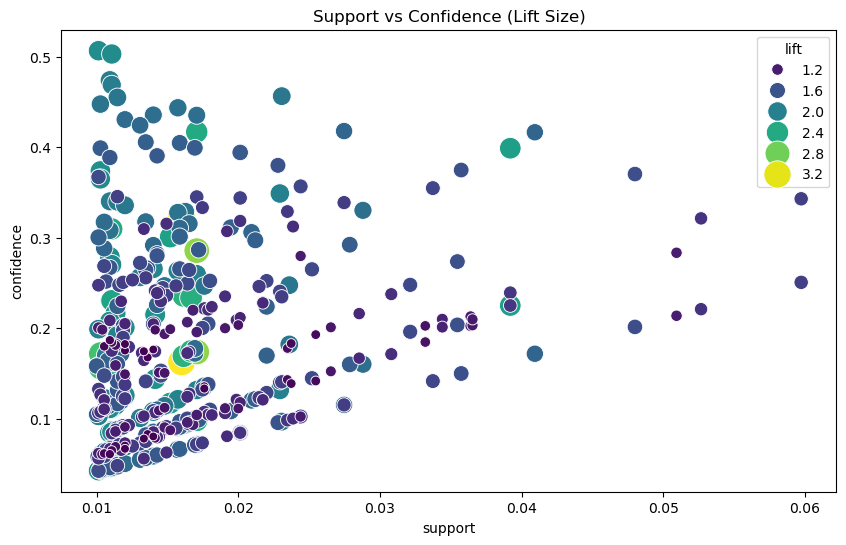

In [71]:
# Step 8: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", sizes=(40, 400), palette="viridis")
plt.title("Support vs Confidence (Lift Size)")
plt.show()


In [72]:
print("\nObservations:")
print("- Rules with higher lift indicate stronger associations.")
print("- Support tells how frequently the itemset appears in the dataset.")
print("- Confidence tells how often the rule has been found to be true.")


Observations:
- Rules with higher lift indicate stronger associations.
- Support tells how frequently the itemset appears in the dataset.
- Confidence tells how often the rule has been found to be true.


## INTERVIEW QUESTIONS

## 1.	What is lift and why is it important in Association rules?

In [73]:
# Lift is a metric used to measure the strength of a rule,It removes popularity bias- Just because two products are popular doesn't mean they are related.
# Confirms meaningful rules: Lift > 1 ensures that items are more likely to be bought together than by chance.

## 2.	What is support and Confidence. How do you calculate them?

In [74]:
# Support measures how frequently an itemset appears in the dataset.
# It helps to identify the most common combinations of items.

# Support(A)=  Number of transactions containing A  by  Total number of transactions.

## 3.	What are some limitations or challenges of Association rules mining?

In [75]:
# 1. Too Many Rules
# It can generate thousands of rules, many of which are not useful.

# 2. Low Support but Important Rules
# Some important patterns occur rarely and may be filtered out because of low support.

# 3. Ignores Order or Time
# It doesn’t consider when items were bought — only that they were bought together.